## Random Forest Regression Modell Tuning over GridSearch

### Results summary: 

> ### Using all Features: 
> Model  | Estimator  | Target    | $R^2$             | Max Error   | Scale 
>  ---   | ---        | ---       | ---               | ---         | -- 
> 1      | RF         | Asthma    | -0.35             | 10.7        | #/10,000
> 2      | RF         | Low Birth Weight  |  -0.25    | 7           | #/100
> 2      | RF         | Cardiovascular Disease    | 0.01 | 30       | #/10,000

<br>


> ### Dropping SocioEconomic Features: 
> Model  | Estimator  | Target    | $R^2$             | Max Error   | Scale 
>  ---   | ---        | ---       | ---               | ---         | -- 
> 1      | RF         | Asthma    | -0.01             | 180 	    | #/10,000         
> 2      | RF         | Low Birth Weight                |  -0.25    | 8     | #/100          
> 2      | RF         | Cardiovascular Disease    | -0.05  | 30    | #/10,000     
> 

 ### None of these models predictably return health outcomes. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('gstyle.mplstyle') 

In [2]:
# custom imports
import metricsWSVR as m                     # my module, rf 
plt.style.use('gstyle.mplstyle')            # stylesheet for sns

pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [3]:
path = '../processed_data/all_merged2.csv'
df = pd.read_csv(path)

df.shape

(25444, 62)

In [4]:
df.dropna(inplace=True)
df.shape

(14912, 62)

In [5]:
# FROM DAVID'S NB: cutting out percentiles, lat/lon, zip, census tract, "scores"

initial_columns_to_fit =[
 'total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']

## Random Forest Regression, TARGET = Asthma Hospitalization Rate
 * Gridsearch with `rf_params`

pre-processing ... 
fitting ...
error calculations ... 
plotting ... 


(<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=10, max_features=1, max_leaf_nodes=50,
                       n_jobs=-1, random_state=42)>,
                  Feature  Importance
 0                  ozone    0.052401
 1                  pm2.5    0.042861
 2              diesel pm    0.028439
 3             pesticides    0.009391
 4                traffic    0.022306
 5          cleanup sites    0.024449
 6    groundwater threats    0.028066
 7             haz. waste    0.019165
 8      imp. water bodies    0.022628
 9            solid waste    0.011070
 10      pollution burden    0.038199
 11             education    0.149449
 12  linguistic isolation    0.042882
 13               poverty    0.152847
 14        drinking water    0.047992
 15          tox. release    0.038426
 16          unemployment    0.097875
 17        housing burden    0.084764
 18             est total    0.023592
 19               est gen    0.021992
 20              est cold    0.0223

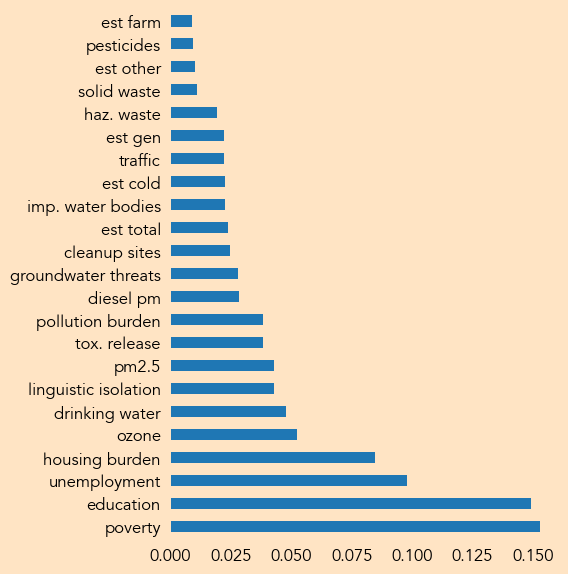

In [9]:
y = df['asthma']
X = df[initial_columns_to_fit]

X = X.drop(columns = [
    'asthma', 
    'pop. char. ', 
    'cardiovascular disease', 
    'low birth weight',
    'total population'
    ])
# X.head()

rf_params = {
    'max_depth' : [10, 20, 30], 
    'max_features' : [1],
    'max_leaf_nodes' : [30, 50],
    'n_estimators' : [100, 200], 
    'n_jobs': [-1],  
    'random_state' : [42], 
    'verbose': [0], 
} 	

rf_asthma = m.gs_rf(X, y, rf_params);
rf_asthma

## Random Forest Regression, TARGET = % Low Birth Weight
 * Gridsearch with `rf_params`

pre-processing ... 
fitting ...
error calculations ... 
plotting ... 


(<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=10, max_features=1, max_leaf_nodes=50,
                       n_estimators=200, n_jobs=-1, random_state=42)>,
                  Feature  Importance
 0                  ozone    0.043421
 1                  pm2.5    0.046831
 2              diesel pm    0.039701
 3             pesticides    0.030319
 4                traffic    0.030577
 5          cleanup sites    0.022389
 6    groundwater threats    0.019363
 7             haz. waste    0.020346
 8      imp. water bodies    0.031929
 9            solid waste    0.014312
 10      pollution burden    0.052488
 11             education    0.119116
 12  linguistic isolation    0.103697
 13               poverty    0.125686
 14        drinking water    0.036138
 15          tox. release    0.060033
 16          unemployment    0.065078
 17        housing burden    0.088504
 18             est total    0.015487
 19               est gen    0.014666
 20              

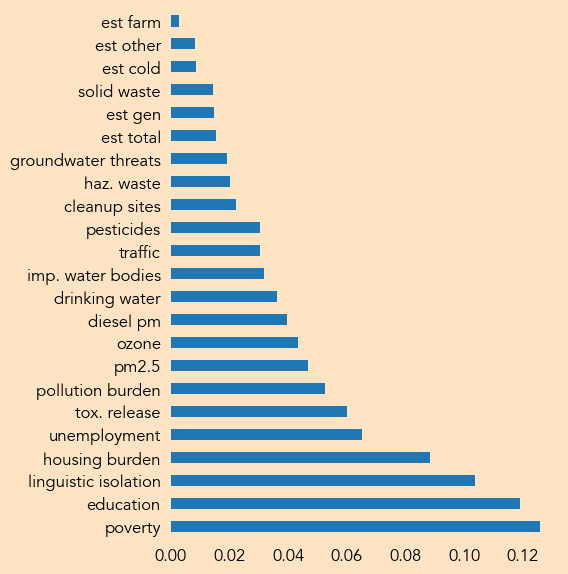

In [10]:
y = df['low birth weight']
X = df[initial_columns_to_fit]

X = X.drop(columns = [
    'asthma', 
    'pop. char. ', 
    'cardiovascular disease', 
    'low birth weight',
    'total population'
    ])
# X.head()

rf_params = {
    'max_depth' : [10, 20, 30], 
    'max_features' : [1],
    'max_leaf_nodes' : [30, 50],
    'n_estimators' : [100, 200], 
    'n_jobs': [-1],  
    'random_state' : [42], 
    'verbose': [0], 
} 	

rf_lbw2 = m.gs_rf(X, y, rf_params);
rf_lbw2

## Random Forest Regression, TARGET = Cardiovascular
 * Gridsearch with `rf_params`

pre-processing ... 
fitting ...
error calculations ... 
plotting ... 


(<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=30, max_features=1, max_leaf_nodes=50,
                       n_estimators=200, n_jobs=-1, random_state=42)>,
                  Feature  Importance
 0                  ozone    0.091025
 1                  pm2.5    0.052109
 2              diesel pm    0.284337
 3             pesticides    0.014339
 4                traffic    0.015206
 5          cleanup sites    0.011080
 6    groundwater threats    0.012959
 7             haz. waste    0.047209
 8      imp. water bodies    0.016106
 9            solid waste    0.008686
 10      pollution burden    0.029824
 11             education    0.100700
 12  linguistic isolation    0.025612
 13               poverty    0.087508
 14        drinking water    0.049465
 15          tox. release    0.028353
 16          unemployment    0.023213
 17        housing burden    0.028661
 18             est total    0.020176
 19               est gen    0.023723
 20              

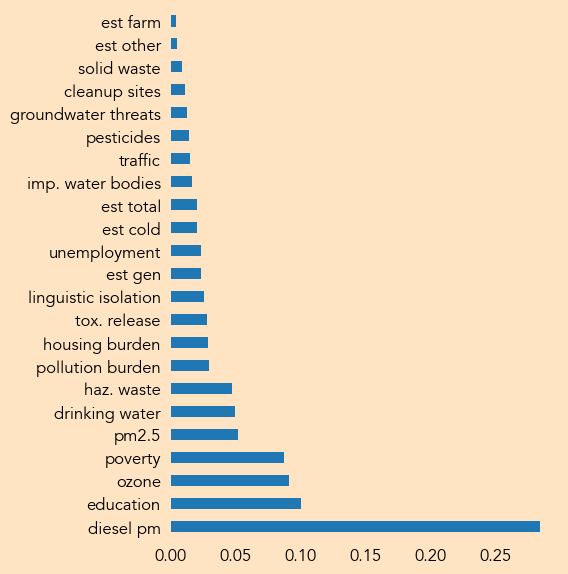

In [12]:
y = df['cardiovascular disease']
X = df[initial_columns_to_fit]

X = X.drop(columns = [
    'asthma', 
    'pop. char. ', 
    'cardiovascular disease', 
    'low birth weight',
    'total population'
    ])
# X.head()

rf_params = {
    'max_depth' : [10, 20, 30], 
    'max_features' : [1],
    'max_leaf_nodes' : [30, 50],
    'n_estimators' : [100, 200], 
    'n_jobs': [-1],  
    'random_state' : [42], 
    'verbose': [0], 
} 		

rf_cvd = m.gs_rf(X, y, rf_params);
rf_cvd

---
## Asthma, no socio economic

pre-processing ... 
fitting ...
error calculations ... 
plotting ... 


(<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=10, max_features=1, max_leaf_nodes=50,
                       n_estimators=200, n_jobs=-1, random_state=42)>,
                 Feature  Importance
 0                 ozone    0.118408
 1                 pm2.5    0.105742
 2             diesel pm    0.053317
 3            pesticides    0.025218
 4               traffic    0.043010
 5         cleanup sites    0.056593
 6   groundwater threats    0.061889
 7            haz. waste    0.041064
 8     imp. water bodies    0.053520
 9           solid waste    0.024771
 10     pollution burden    0.071810
 11       drinking water    0.087380
 12         tox. release    0.075838
 13            est total    0.056992
 14              est gen    0.046986
 15             est cold    0.037143
 16             est farm    0.019610
 17            est other    0.020709,
   Metric         Value
 0     r2 -9.040000e-02
 1    rss  1.490285e+07
 2  max_e  1.820718e+02
 3   rmse  3.16

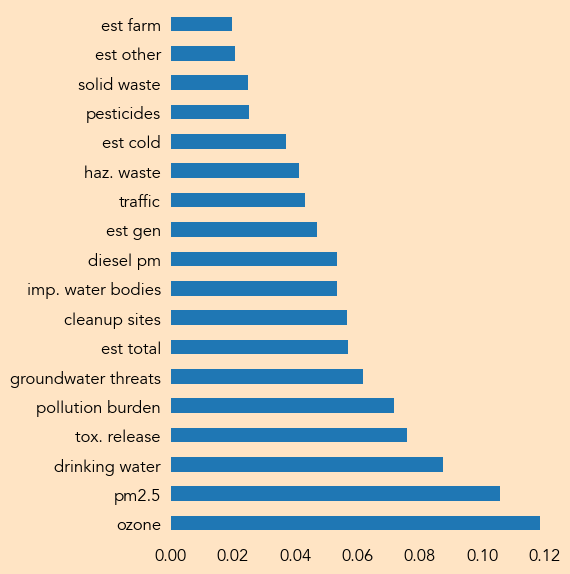

In [13]:
y = df['asthma']
X = df[initial_columns_to_fit]

X = X.drop(columns = [
    'asthma', 
    'pop. char. ', 
    'cardiovascular disease', 
    'low birth weight',
    'total population', 
    'education',
    'poverty', 
    'unemployment', 
    'housing burden', 
    'linguistic isolation'
    ])
# X.head()

rf_params = {
    'max_depth' : [10, 20, 30], 
    'max_features' : [1],
    'max_leaf_nodes' : [30, 50],
    'n_estimators' : [100, 200], 
    'n_jobs': [-1],  
    'random_state' : [42], 
    'verbose': [0], 
} 	

rf_asthma_nse = m.gs_rf(X, y, rf_params);
rf_asthma_nse

---
## low birth weight, no SE

pre-processing ... 
fitting ...
error calculations ... 
plotting ... 


(<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=30, max_features=1, max_leaf_nodes=50,
                       n_estimators=200, n_jobs=-1, random_state=42)>,
                 Feature  Importance
 0                 ozone    0.098815
 1                 pm2.5    0.131607
 2             diesel pm    0.068524
 3            pesticides    0.056266
 4               traffic    0.058925
 5         cleanup sites    0.048954
 6   groundwater threats    0.039935
 7            haz. waste    0.041034
 8     imp. water bodies    0.053377
 9           solid waste    0.030296
 10     pollution burden    0.104768
 11       drinking water    0.066452
 12         tox. release    0.112342
 13            est total    0.028160
 14              est gen    0.024560
 15             est cold    0.015616
 16             est farm    0.006352
 17            est other    0.014017,
   Metric       Value
 0     r2     -0.0587
 1    rss  38301.5389
 2  max_e      8.0535
 3   rmse      1.6027
 

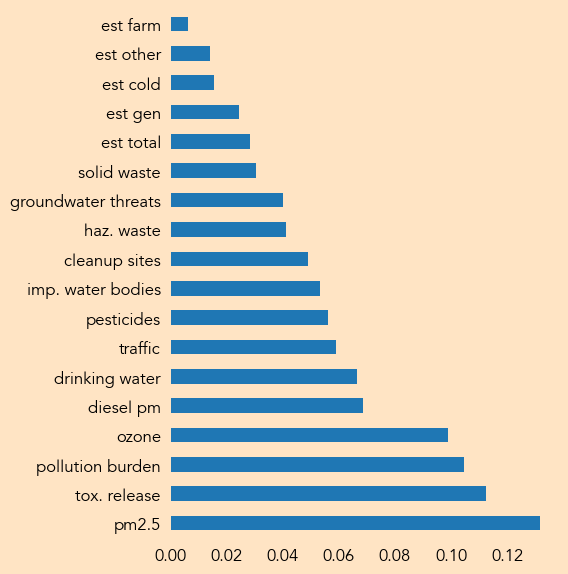

In [14]:
y = df['low birth weight']
X = df[initial_columns_to_fit]

X = X.drop(columns = [
    'asthma', 
    'pop. char. ', 
    'cardiovascular disease', 
    'low birth weight',
    'total population', 
    'education',
    'poverty', 
    'unemployment', 
    'housing burden', 
    'linguistic isolation'
    ])

rf_params = {
    'max_depth' : [10, 20, 30], 
    'max_features' : [1],
    'max_leaf_nodes' : [30, 50],
    'n_estimators' : [100, 200], 
    'n_jobs': [-1],  
    'random_state' : [42], 
    'verbose': [0], 
} 	

rf_lbw_nse = m.gs_rf(X, y, rf_params);
rf_lbw_nse

---
## Cardiovascular, no socioeconomic 

pre-processing ... 
fitting ...
error calculations ... 
plotting ... 


(<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=10, max_features=1, max_leaf_nodes=50,
                       n_jobs=-1, random_state=42)>,
                 Feature  Importance
 0                 ozone    0.159317
 1                 pm2.5    0.090643
 2             diesel pm    0.285779
 3            pesticides    0.023414
 4               traffic    0.023868
 5         cleanup sites    0.017789
 6   groundwater threats    0.020119
 7            haz. waste    0.072997
 8     imp. water bodies    0.024263
 9           solid waste    0.014982
 10     pollution burden    0.047836
 11       drinking water    0.067637
 12         tox. release    0.047063
 13            est total    0.035879
 14              est gen    0.026826
 15             est cold    0.027694
 16             est farm    0.005507
 17            est other    0.008389,
   Metric        Value
 0     r2      -0.0052
 1    rss  358810.5299
 2  max_e      29.7191
 3   rmse       4.9053
 4    mae     

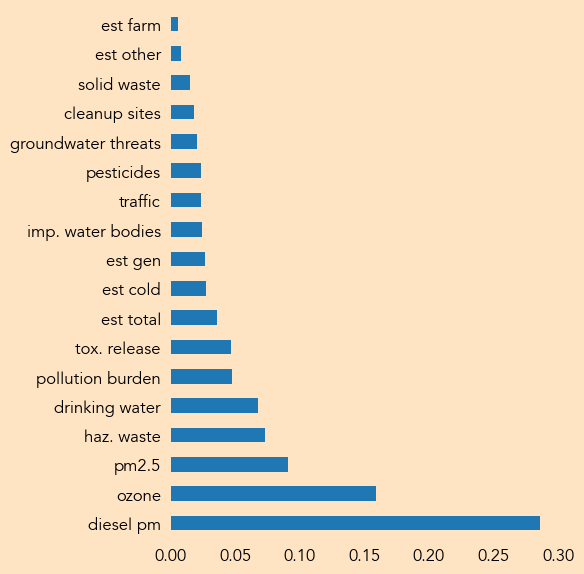

In [15]:
y = df['cardiovascular disease']
X = df[initial_columns_to_fit]

X = X.drop(columns = [
    'asthma', 
    'pop. char. ', 
    'cardiovascular disease', 
    'low birth weight',
    'total population', 
    'education',
    'poverty', 
    'unemployment', 
    'housing burden', 
    'linguistic isolation'
    ])

rf_params = {
    'max_depth' : [10, 20, 30], 
    'max_features' : [1],
    'max_leaf_nodes' : [30, 50],
    'n_estimators' : [100, 200], 
    'n_jobs': [-1],  
    'random_state' : [42], 
    'verbose': [0], 
} 			

rf_cvd_nse = m.gs_rf(X, y, rf_params);
rf_cvd_nse

---
Asthma, only warehouses
---

pre-processing ... 
fitting ...
error calculations ... 
plotting ... 


(<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=20, max_features=1, max_leaf_nodes=50,
                       n_jobs=-1, random_state=42)>,
      Feature  Importance
 0   est farm    0.117787
 1  est other    0.175353
 2   est cold    0.242460
 3    est gen    0.464400,
   Metric         Value
 0     r2 -2.370000e-02
 1    rss  1.399145e+07
 2  max_e  1.905141e+02
 3   rmse  3.063120e+01
 4    mae  9.382679e+02
 5    mse  9.382679e+02)

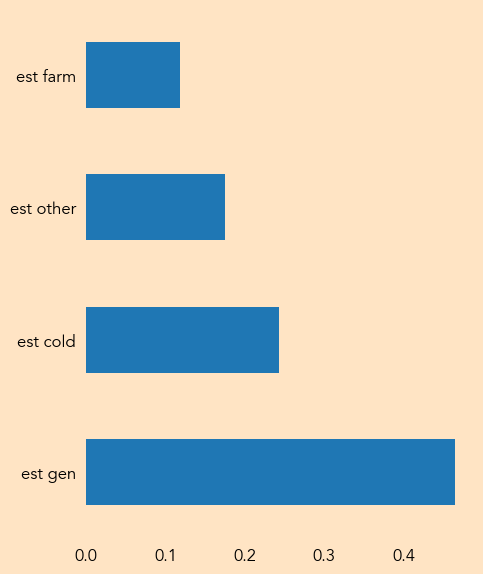

In [18]:
y = df['asthma']
X = df[[
    'est farm', 
    'est other',
    'est cold',
    'est gen'
]]

# X.head()

rf_params = {
    'max_depth' : [10, 20, 30], 
    'max_features' : [1],
    'max_leaf_nodes' : [30, 50],
    'n_estimators' : [100, 200], 
    'n_jobs': [-1],  
    'random_state' : [42], 
    'verbose': [0], 
} 	

rf_asthma_WH = m.gs_rf(X, y, rf_params);
rf_asthma_WH

In [16]:
# # m.gs_svr( X, y, train size)

# # returns: estimator, rf_coef_dfa
# svr_results = m.gs_svr(X, y, 0.7)
# svr_results 